<a href="https://colab.research.google.com/github/Macdaline100/Public-Data/blob/master/Predict%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**<font color='red'>Climate Change Belief Analysis</font>**

© Explore Data Science Academy

Team 13
##**<font color='green'>Introduction: Climate Change Belief</font>**

<p align="justify" > Many companies are built around lessening one’s environmental impact or carbon
footprint. They offer products and services that are environmentally friendly  and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat.
This would add to their market research efforts in gauging how their product/service may be received.


##**<font color='purple'>Task: Classification based on Tweets</font>**
<p align="justify" > To create a Machine Learning model that is able to classify whether or not a
person believes in climate change, based on their novel tweet data.
Hence, providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and
geographic categories thus increasing their insights and informing future
marketing strategies.

<div align="center" style="width: 800px; font-size: 100%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Macdaline100/Explore/main/Screenshot%20(478).png"
     alt="Climate Change"
     style="float: center; padding-bottom=0.5em"
     width=600px/>
Climate Change  Photo by <a href="https://explore-datascience.net"> explore-datascience.net </a> 
</div>



 <a id="one"></a>
## Importing Packages

In this section we are importing all the relavant packages which will be used for analysis and modeling.

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import re

# Libraries for data preparation and model building

# Import the scaling module
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate 

# Import train/test split module
from sklearn.model_selection import train_test_split

#Modelling 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation as LDA

from nltk.stem import WordNetLemmatizer, PorterStemmer,SnowballStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.pipeline import Pipeline
#evaluating the model

from sklearn.metrics import f1_score

<a id="two"></a>
## Loading the Data

 Loading the data to be used to build our classification model.


In [2]:
# Loading in the datasets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test_with_no_labels.csv")

#pd.set_option('display.max_columns', None)

In [4]:
#Checking The Shape of the datasets
df_train.shape,df_test.shape

((15819, 3), (10546, 2))

<a id="three"></a>
## Exploratory Data Analysis


<p align="justify" > This section provides an in depth EDA which allowed us to gain deeper insights into the dimensions and features of our data.


In [5]:
#displaying the train data
df_train.head(2)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103


In [6]:
#displaying the test data
df_test.head(2)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326


We have 2 features: Sentiments (Target) and Message (feature) including TweetsId

In [7]:
# Cheking number of classes in our data
df_train['sentiment'].unique()

array([ 1,  2,  0, -1])

In [8]:
# looking at the data statistics
df_train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [9]:
#info of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The data types are object and 2 integers (tweetid and Sentiment) but since Sentiments is suppose to be a category, we will change it to catergory type.





In [12]:
df_train['sentiment']=df_train['sentiment'].astype('object')
df_train.dtypes

sentiment    object
message      object
tweetid       int64
dtype: object

### Cleaning

Checking Missing Values on Our Datasets

In [14]:
round((df_train.isnull().sum()/df_train.shape[0])
      *100,2).astype(str)+ ' %'

sentiment    0.0 %
message      0.0 %
tweetid      0.0 %
dtype: object

In [16]:
# Checking for missing values
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

No Missing Values in our Dataset i.e. we have 0 null values on our data.


In [18]:
for col_name in df_train.columns:
    if df_train[col_name].dtypes == 'float64':
        unique_Val = len(df_train[col_name].unique())
        print("Feature '{col_name}' has {unique_Val} unique values".format(col_name = col_name, unique_Val = unique_Val))

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Distribution of target labels')

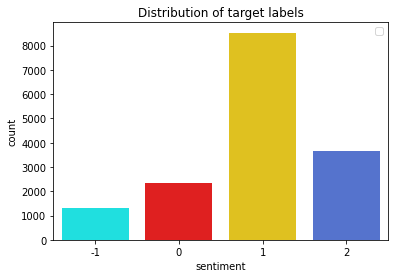

In [27]:
# Visualizing the distribution of the feature to the target
colors = ['aqua', 'red', 'gold', 'royalblue']
sns.countplot(data=df_train, x='sentiment', palette=colors)
plt.legend();
plt.title('Distribution of the target labels')

<a id="four"></a>
## Data Engineering

Split dataset into Dependent and independent variables
We are to split the dataset into dependent (Y) and independent variables (X).

<a id="five"></a>
## Modelling

We are spliting our X and y into Training and Testing sets.

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.30,
                                                    random_state=42,
                                                    shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6134, 37), (2629, 37), (6134,), (2629,))

### Train Model
After data preparation, we are now creating and training the model using Scikit-learn. We import the different regression model from skicit-learn, instantiate the model, and fitthe model on the training data. We set the random state for reproducible results.


### Lasso Regression

In [ ]:
# create one or more ML models
# Import LASSO module

# Create LASSO model object
lasso = Lasso(alpha=1)

# Train the LASSO model
lasso.fit(X_train, y_train)


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

### Ridge Regression

In [ ]:
# Import Ridge regression model

# Create ridge model
ridge = Ridge()

# Train the model
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Random Forest Regressor

In [ ]:
#import Random Forest Regressor

RF = RandomForestRegressor(n_estimators=30, max_depth=5)
RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Decision Tree

In [ ]:
#import decision tree regressor


# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=3,random_state=42)
regr_tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

### Evaluating Models i.e Making Predictions on the Test Set: 

Our model has now been trained to learn the relationships between the features and the targets. The next step is figuring out how good the model is! To do this we make predictions on the test features (the model is never allowed to see the test answers). We then compare the predictions to the known answers.


In [ ]:
# evaluate one or more ML models

# Make training set predictions for each model
train_lasso = lasso.predict(X_train)
test_lasso = lasso.predict(X_test)

train_ridge = ridge.predict(X_train)
test_ridge = ridge.predict(X_test)

train_forest = RF.predict(X_train)
test_forest = RF.predict(X_test)


train_tree = regr_tree.predict(X_train)
test_tree = regr_tree.predict(X_test)

<a id="six"></a>
## Model Performance
<a class="anchor" id="1.1"></a>



Comparing Model Performance: The Model is tested using and Error metrics which  enables us to track the efficiency and accuracy. The metrics we are using is called the Root Mean Squared Error (RMSE). The RMSE measures the average magnitude of the prediction error.

The formula of the n *RMSE* which is simply the square root of the *MSE* is written below:


\begin{align}
RMSE & = \sqrt{MSE} \\
     & = \sqrt{\frac{1}{N}\sum^{N} (\hat{y_i} - y_i)^{2}}
\end{align}

Where $y_i$ are the actual target values for a dataset with $N$ datapoints, and $\hat{y_i}$ represent our corresponding predictions. RMSE is a more intuitive metric to use than MSE because it is in the same units as the underlying variable being predicted.

All the Regression Model's will be tested using the RMSE: 

In [ ]:
# Compare model performance


# Dictionary of results
results_dict = {'Training RMSE':
                    {
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso, squared=False), 
                        "RIDGE": metrics.mean_squared_error(y_train, train_ridge, squared=False),
                        "FOREST": metrics.mean_squared_error(y_train, train_forest, squared=False),
                        "D_TREE": metrics.mean_squared_error(y_train, train_tree, squared=False)
                    },
                    'Test RMSE':
                    {
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso, squared=False),
                        "RIDGE": metrics.mean_squared_error(y_test, test_ridge, squared=False),
                        "FOREST": metrics.mean_squared_error(y_test, test_forest, squared=False),
                        "D_TREE": metrics.mean_squared_error(y_test, test_tree, squared=False)
                    }
                }

### Results of all the models
The results of the models are summarized and shown with regards to the Training and Testing RMSE.

In [ ]:
# Create dataframe from the dictionary of all the RMSE results
results_df = pd.DataFrame(data=results_dict)
results_df

,Training RMSE,Test RMSE
LASSO,4870.235196,4973.319798
RIDGE,4870.220382,4973.233831
FOREST,4450.369869,5072.468084
D_TREE,4820.325078,5161.304254


In [ ]:
X_train=np.arange(0,len(X_train),1)
X_test=np.arange(0,len(X_test),1)

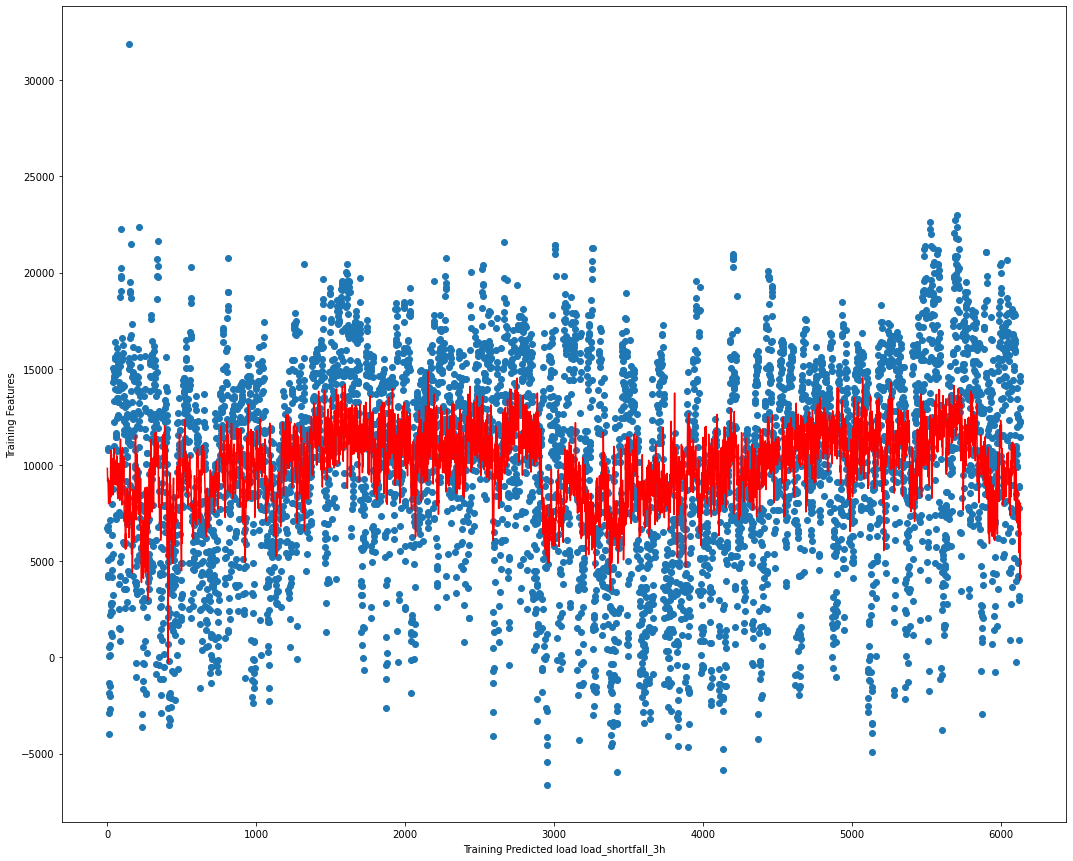

In [ ]:
# plot the results
plt.figure(figsize=(18,15))
plt.scatter(X_train, y_train)  # plot the original data
plt.plot(X_train, train_ridge, color='red')  # plot the line connecting the generated y-values
plt.ylabel("Training Features")
plt.xlabel("Training Predicted load load_shortfall_3h")
plt.show()


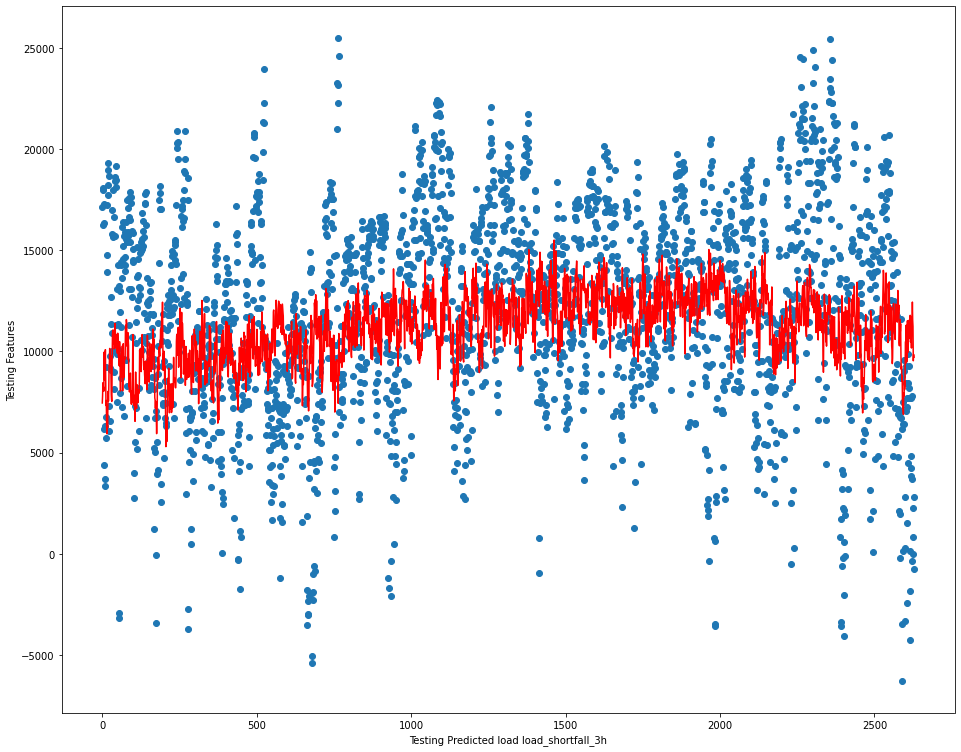

In [ ]:
# plot the results
plt.figure(figsize=(16,13))
plt.scatter(X_test, y_test)  # plot the original data
plt.plot(X_test, test_ridge, color='red')  # plot the line connecting the generated y-values
plt.ylabel("Testing Features")
plt.xlabel("Testing Predicted load load_shortfall_3h")
plt.show()

Clearly the Ridge performed a lot better in trying to predict.

Considering the Test Root Mean Squared Error is lowest for the Ridge Regression model, it makes the most sense that this model should be used in our shortfall predictions on unseen data. 


#### PICKLING and Submission


In [ ]:
model_save_path = "modelv3.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(ridge,file)

In [ ]:
predictions = ridge.predict(X_scaled_test)
submission = pd.DataFrame({'time':df_test.index,'load_shortfall_3h':predictions})
submission = submission.set_index('time')
submission.to_csv('submission.csv',index=True)
submission

<a id="seven"></a>
## Model Explanations
Explanation of Our chosen Model


# Here’s a little insight into our thinking process…
Real world problem solving is complex. There are multiple contributing factors that are correlated. Think of them as pros and cons to every solutions factor. This is known as Multicollinearity

Multicollinearity can create inaccurate estimates and inflate standard errors. As we began creating our models, we searched for a low Root Mean Squared Error, otherwise known as RMSE. RMSE is used to measure the difference between predicted and actual values. It gives us a measure of “how far off were we?” Once we had tested our models we noticed that Ridge model gave us the lowest RMSE. Ridge regression allows us to differentiate “important” from “less-important” contributors in the model thus allowing us to fight the impact of Multicollinearity. Furthermore it adds just enough bias to make the estimates reliable compared to true values. Another goal we pursued was attaining a model that would generalise the pattern , and work well on test data too. We rejected models that would Overfit the data. “Overfitting” occurs when the trained model works well on the training data but poor on the testing data. Ridge regression prevents overfitting.

In trying to explain how our ridge regression model works, it is important to note that certain predictor variables are more important than others regarding predictive capability. As a result, variables may either be dropped altogether, or may be weighted according to how much they contribute to a prediction. The ridge regression model works to minimise the impact of low-predictive ability variables by scaling them using a penalty function. That penalty function or 'term', as its known, is applied to each term and allows shrinkage of the effect of variables with high variance. Additionally, our model does suffer from issues of multicollinearity, meaning that variables are autocorrelated to each other. This poses an issue to regression modelling. Fortunately, due to its ability to shrink the effect of predictors, ridge regression is able help mitigate any multicollinearity issues we have faced. 

#### Summary
* The Problem and Solution
* Key Findings
* The value of the chosen model